In [1]:
import pandas as pd
pd.set_option('display.max_columns', None)
listings = pd.read_csv('listings.csv')
listings.head()

,id,listing_url,scrape_id,last_scraped,name,description,neighborhood_overview,picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms,bathrooms_text,bedrooms,beds,amenities,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,2595,https://www.airbnb.com/rooms/2595,20210204180331,2021-02-05,Skylit Midtown Castle,"Beautiful, spacious skylit studio in the heart...",Centrally located in the heart of Manhattan ju...,https://a0.muscache.com/pictures/f0813a11-40b2...,2845,https://www.airbnb.com/users/show/2845,Jennifer,2008-09-09,"New York, New York, United States",A New Yorker since 2000! My passion is creatin...,within a few hours,93%,26%,f,https://a0.muscache.com/im/pictures/user/50fc5...,https://a0.muscache.com/im/pictures/user/50fc5...,Midtown,6.0,6.0,"['email', 'phone', 'reviews', 'offline_governm...",t,t,"New York, United States",Midtown,Manhattan,40.75362,-73.98377,Entire apartment,Entire home/apt,2,NaN,1 bath,NaN,1.0,"[""Refrigerator"", ""Air conditioning"", ""Baking s...",$100.00,30,1125,30.0,30.0,1125.0,1125.0,30.0,1125.0,NaN,t,30,60,90,365,2021-02-05,48,0,0,2009-11-21,2019-11-04,94.0,9.0,9.0,10.0,10.0,10.0,9.0,NaN,f,2,2,0,0,0.35
1,3831,https://www.airbnb.com/rooms/3831,20210204180331,2021-02-05,"Whole flr w/private bdrm, bath & kitchen(pls r...","Enjoy 500 s.f. top floor in 1899 brownstone, w...",Just the right mix of urban center and local n...,https://a0.muscache.com/pictures/e49999c2-9fd5...,4869,https://www.airbnb.com/users/show/4869,LisaRoxanne,2008-12-07,"New York, New York, United States",Laid-back Native New Yorker (formerly bi-coast...,within a few hours,98%,93%,f,https://a0.muscache.com/im/users/4869/profile_...,https://a0.muscache.com/im/users/4869/profile_...,Clinton Hill,1.0,1.0,"['email', 'phone', 'reviews', 'offline_governm...",t,t,"Brooklyn, New York, United States",Clinton Hill,Brooklyn,40.68514,-73.95976,Entire guest suite,Entire home/apt,3,NaN,1 bath,1.0,3.0,"[""Refrigerator"", ""Microwave"", ""Shampoo"", ""High...",$73.00,1,730,1.0,1.0,1125.0,1125.0,1.0,1125.0,NaN,t,6,27,55,249,2021-02-05,386,80,3,2014-09-30,2021-01-27,90.0,10.0,9.0,9.0,10.0,10.0,10.0,NaN,f,1,1,0,0,4.99
2,5121,https://www.airbnb.com/rooms/5121,20210204180331,2021-02-05,BlissArtsSpace!,<b>The space</b><br />HELLO EVERYONE AND THANK...,NaN,https://a0.muscache.com/pictures/2090980c-b68e...,7356,https://www.airbnb.com/users/show/7356,Garon,2009-02-03,"New York, New York, United States","I am an artist(painter, filmmaker) and curato...",NaN,NaN,NaN,f,https://a0.muscache.com/im/pictures/user/72a61...,https://a0.muscache.com/im/pictures/user/72a61...,Bedford-Stuyvesant,1.0,1.0,"['email', 'phone', 'facebook', 'reviews', 'off...",t,t,NaN,Bedford-Stuyvesant,Brooklyn,40.68688,-73.95596,Private room in apartment,Private room,2,NaN,NaN,1.0,1.0,"[""Wifi"", ""Heating"", ""Air conditioning"", ""Long ...",$60.00,30,730,30.0,30.0,730.0,730.0,30.0,730.0,NaN,t,30,60,90,365,2021-02-0

In [2]:
listings.shape

(37012, 74)

In [3]:
neighbourhoods = pd.read_csv('neighbourhoods.csv')
neighbourhoods.head() #which neighbourhood belongs to which borough

,neighbourhood_group,neighbourhood
0,Bronx,Allerton
1,Bronx,Baychester
2,Bronx,Belmont
3,Bronx,Bronxdale
4,Bronx,Castle Hill


In [4]:
calendar = pd.read_csv('calendar.csv')
calendar.head()

,listing_id,date,available,price,adjusted_price,minimum_nights,maximum_nights
0,21456,2021-02-05,t,$85.00,$85.00,30.0,365.0
1,59709,2021-02-05,f,$160.00,$160.00,7.0,31.0
2,59709,2021-02-06,f,$160.00,$160.00,7.0,31.0
3,59709,2021-02-07,f,$160.00,$160.00,7.0,31.0
4,59709,2021-02-08,f,$160.00,$160.00,7.0,31.0


Define popularity and add as a column of listings dataframe

Popular / Unpopular labels:

1.Host since 多少天 * 365天available的比例 = 一共available了多少天since host

2.Total reviews / 一共available了多少天since host ≈  booking rates of each property (不准，写在conclusion的提升部分)

3.根据booking rates一列的median，define出popular/unpolupar，给每一行加上label


In [5]:
listings.head()

,id,listing_url,scrape_id,last_scraped,name,description,neighborhood_overview,picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms,bathrooms_text,bedrooms,beds,amenities,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,2595,https://www.airbnb.com/rooms/2595,20210204180331,2021-02-05,Skylit Midtown Castle,"Beautiful, spacious skylit studio in the heart...",Centrally located in the heart of Manhattan ju...,https://a0.muscache.com/pictures/f0813a11-40b2...,2845,https://www.airbnb.com/users/show/2845,Jennifer,2008-09-09,"New York, New York, United States",A New Yorker since 2000! My passion is creatin...,within a few hours,93%,26%,f,https://a0.muscache.com/im/pictures/user/50fc5...,https://a0.muscache.com/im/pictures/user/50fc5...,Midtown,6.0,6.0,"['email', 'phone', 'reviews', 'offline_governm...",t,t,"New York, United States",Midtown,Manhattan,40.75362,-73.98377,Entire apartment,Entire home/apt,2,NaN,1 bath,NaN,1.0,"[""Refrigerator"", ""Air conditioning"", ""Baking s...",$100.00,30,1125,30.0,30.0,1125.0,1125.0,30.0,1125.0,NaN,t,30,60,90,365,2021-02-05,48,0,0,2009-11-21,2019-11-04,94.0,9.0,9.0,10.0,10.0,10.0,9.0,NaN,f,2,2,0,0,0.35
1,3831,https://www.airbnb.com/rooms/3831,20210204180331,2021-02-05,"Whole flr w/private bdrm, bath & kitchen(pls r...","Enjoy 500 s.f. top floor in 1899 brownstone, w...",Just the right mix of urban center and local n...,https://a0.muscache.com/pictures/e49999c2-9fd5...,4869,https://www.airbnb.com/users/show/4869,LisaRoxanne,2008-12-07,"New York, New York, United States",Laid-back Native New Yorker (formerly bi-coast...,within a few hours,98%,93%,f,https://a0.muscache.com/im/users/4869/profile_...,https://a0.muscache.com/im/users/4869/profile_...,Clinton Hill,1.0,1.0,"['email', 'phone', 'reviews', 'offline_governm...",t,t,"Brooklyn, New York, United States",Clinton Hill,Brooklyn,40.68514,-73.95976,Entire guest suite,Entire home/apt,3,NaN,1 bath,1.0,3.0,"[""Refrigerator"", ""Microwave"", ""Shampoo"", ""High...",$73.00,1,730,1.0,1.0,1125.0,1125.0,1.0,1125.0,NaN,t,6,27,55,249,2021-02-05,386,80,3,2014-09-30,2021-01-27,90.0,10.0,9.0,9.0,10.0,10.0,10.0,NaN,f,1,1,0,0,4.99
2,5121,https://www.airbnb.com/rooms/5121,20210204180331,2021-02-05,BlissArtsSpace!,<b>The space</b><br />HELLO EVERYONE AND THANK...,NaN,https://a0.muscache.com/pictures/2090980c-b68e...,7356,https://www.airbnb.com/users/show/7356,Garon,2009-02-03,"New York, New York, United States","I am an artist(painter, filmmaker) and curato...",NaN,NaN,NaN,f,https://a0.muscache.com/im/pictures/user/72a61...,https://a0.muscache.com/im/pictures/user/72a61...,Bedford-Stuyvesant,1.0,1.0,"['email', 'phone', 'facebook', 'reviews', 'off...",t,t,NaN,Bedford-Stuyvesant,Brooklyn,40.68688,-73.95596,Private room in apartment,Private room,2,NaN,NaN,1.0,1.0,"[""Wifi"", ""Heating"", ""Air conditioning"", ""Long ...",$60.00,30,730,30.0,30.0,730.0,730.0,30.0,730.0,NaN,t,30,60,90,365,2021-02-0

In [6]:
import warnings
warnings.filterwarnings('ignore')
from datetime import date
listings['host_since'] =  pd.to_datetime(listings['host_since']) 
listings['last_scraped'] =  pd.to_datetime(listings['last_scraped']) 
host_since = listings['host_since']
last_scraped = listings['last_scraped']
tot_hos_days = (last_scraped - host_since).astype('timedelta64[D]')
listings['tot_hos_days'] = tot_hos_days
listings['tot_aval_days'] = listings['tot_hos_days']*(listings['availability_365']/365)
listings = listings[listings['tot_aval_days'] > 0]
listings['booking_rate'] = listings['number_of_reviews']/listings['tot_aval_days']
listings = listings.reset_index()
listings.head()

,index,id,listing_url,scrape_id,last_scraped,name,description,neighborhood_overview,picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms,bathrooms_text,bedrooms,beds,amenities,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,tot_hos_days,tot_aval_days,booking_rate
0,0,2595,https://www.airbnb.com/rooms/2595,20210204180331,2021-02-05,Skylit Midtown Castle,"Beautiful, spacious skylit studio in the heart...",Centrally located in the heart of Manhattan ju...,https://a0.muscache.com/pictures/f0813a11-40b2...,2845,https://www.airbnb.com/users/show/2845,Jennifer,2008-09-09,"New York, New York, United States",A New Yorker since 2000! My passion is creatin...,within a few hours,93%,26%,f,https://a0.muscache.com/im/pictures/user/50fc5...,https://a0.muscache.com/im/pictures/user/50fc5...,Midtown,6.0,6.0,"['email', 'phone', 'reviews', 'offline_governm...",t,t,"New York, United States",Midtown,Manhattan,40.75362,-73.98377,Entire apartment,Entire home/apt,2,NaN,1 bath,NaN,1.0,"[""Refrigerator"", ""Air conditioning"", ""Baking s...",$100.00,30,1125,30.0,30.0,1125.0,1125.0,30.0,1125.0,NaN,t,30,60,90,365,2021-02-05,48,0,0,2009-11-21,2019-11-04,94.0,9.0,9.0,10.0,10.0,10.0,9.0,NaN,f,2,2,0,0,0.35,4532.0,4532.000000,0.010591
1,1,3831,https://www.airbnb.com/rooms/3831,20210204180331,2021-02-05,"Whole flr w/private bdrm, bath & kitchen(pls r...","Enjoy 500 s.f. top floor in 1899 brownstone, w...",Just the right mix of urban center and local n...,https://a0.muscache.com/pictures/e49999c2-9fd5...,4869,https://www.airbnb.com/users/show/4869,LisaRoxanne,2008-12-07,"New York, New York, United States",Laid-back Native New Yorker (formerly bi-coast...,within a few hours,98%,93%,f,https://a0.muscache.com/im/users/4869/profile_...,https://a0.muscache.com/im/users/4869/profile_...,Clinton Hill,1.0,1.0,"['email', 'phone', 'reviews', 'offline_governm...",t,t,"Brooklyn, New York, United States",Clinton Hill,Brooklyn,40.68514,-73.95976,Entire guest suite,Entire home/apt,3,NaN,1 bath,1.0,3.0,"[""Refrigerator"", ""Microwave"", ""Shampoo"", ""High...",$73.00,1,730,1.0,1.0,1125.0,1125.0,1.0,1125.0,NaN,t,6,27,55,249,2021-02-05,386,80,3,2014-09-30,2021-01-27,90.0,10.0,9.0,9.0,10.0,10.0,10.0,NaN,f,1,1,0,0,4.99,4443.0,3030.978082,0.127352
2,2,5121,https://www.airbnb.com/rooms/5121,20210204180331,2021-02-05,BlissArtsSpace!,<b>The space</b><br />HELLO EVERYONE AND THANK...,NaN,https://a0.muscache.com/pictures/2090980c-b68e...,7356,https://www.airbnb.com/users/show/7356,Garon,2009-02-03,"New York, New York, United States","I am an artist(painter, filmmaker) and curato...",NaN,NaN,NaN,f,https://a0.muscache.com/im/pictures/user/72a61...,https://a0.muscache.com/im/pictures/user/72a61...,Bedford-Stuyvesant,1.0,1.0,"['email', 'phone', 'facebook', 'reviews', 'off...",t,t,NaN,Bedford-Stuyvesant,Brooklyn,40.68688,-73.95596,Private room in apartment,Private room,2,NaN,NaN,1.0,1.0,"[""Wifi"", ""Heating"", "

In [7]:
import numpy as np
label = np.zeros(len(listings),dtype = int)
for i in range(len(listings)):
    if listings['booking_rate'][i] > np.median(listings['booking_rate']):
        label[i] = 1
    else:
        label[i] = 0
listings['popularity'] = label
listings = listings.drop(columns = ['tot_hos_days','tot_aval_days'])
listings.head()

,index,id,listing_url,scrape_id,last_scraped,name,description,neighborhood_overview,picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms,bathrooms_text,bedrooms,beds,amenities,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,booking_rate,popularity
0,0,2595,https://www.airbnb.com/rooms/2595,20210204180331,2021-02-05,Skylit Midtown Castle,"Beautiful, spacious skylit studio in the heart...",Centrally located in the heart of Manhattan ju...,https://a0.muscache.com/pictures/f0813a11-40b2...,2845,https://www.airbnb.com/users/show/2845,Jennifer,2008-09-09,"New York, New York, United States",A New Yorker since 2000! My passion is creatin...,within a few hours,93%,26%,f,https://a0.muscache.com/im/pictures/user/50fc5...,https://a0.muscache.com/im/pictures/user/50fc5...,Midtown,6.0,6.0,"['email', 'phone', 'reviews', 'offline_governm...",t,t,"New York, United States",Midtown,Manhattan,40.75362,-73.98377,Entire apartment,Entire home/apt,2,NaN,1 bath,NaN,1.0,"[""Refrigerator"", ""Air conditioning"", ""Baking s...",$100.00,30,1125,30.0,30.0,1125.0,1125.0,30.0,1125.0,NaN,t,30,60,90,365,2021-02-05,48,0,0,2009-11-21,2019-11-04,94.0,9.0,9.0,10.0,10.0,10.0,9.0,NaN,f,2,2,0,0,0.35,0.010591,1
1,1,3831,https://www.airbnb.com/rooms/3831,20210204180331,2021-02-05,"Whole flr w/private bdrm, bath & kitchen(pls r...","Enjoy 500 s.f. top floor in 1899 brownstone, w...",Just the right mix of urban center and local n...,https://a0.muscache.com/pictures/e49999c2-9fd5...,4869,https://www.airbnb.com/users/show/4869,LisaRoxanne,2008-12-07,"New York, New York, United States",Laid-back Native New Yorker (formerly bi-coast...,within a few hours,98%,93%,f,https://a0.muscache.com/im/users/4869/profile_...,https://a0.muscache.com/im/users/4869/profile_...,Clinton Hill,1.0,1.0,"['email', 'phone', 'reviews', 'offline_governm...",t,t,"Brooklyn, New York, United States",Clinton Hill,Brooklyn,40.68514,-73.95976,Entire guest suite,Entire home/apt,3,NaN,1 bath,1.0,3.0,"[""Refrigerator"", ""Microwave"", ""Shampoo"", ""High...",$73.00,1,730,1.0,1.0,1125.0,1125.0,1.0,1125.0,NaN,t,6,27,55,249,2021-02-05,386,80,3,2014-09-30,2021-01-27,90.0,10.0,9.0,9.0,10.0,10.0,10.0,NaN,f,1,1,0,0,4.99,0.127352,1
2,2,5121,https://www.airbnb.com/rooms/5121,20210204180331,2021-02-05,BlissArtsSpace!,<b>The space</b><br />HELLO EVERYONE AND THANK...,NaN,https://a0.muscache.com/pictures/2090980c-b68e...,7356,https://www.airbnb.com/users/show/7356,Garon,2009-02-03,"New York, New York, United States","I am an artist(painter, filmmaker) and curato...",NaN,NaN,NaN,f,https://a0.muscache.com/im/pictures/user/72a61...,https://a0.muscache.com/im/pictures/user/72a61...,Bedford-Stuyvesant,1.0,1.0,"['email', 'phone', 'facebook', 'reviews', 'off...",t,t,NaN,Bedford-Stuyvesant,Brooklyn,40.68688,-73.95596,Private room in apartment,Private room,2,NaN,NaN,1.0,1.0,"[""Wifi"", ""Heating"", ""Air conditioning"", ""Long ...",$60.00,30,730,30.

In [8]:
features = listings[['host_neighbourhood','property_type','room_type','accommodates','bathrooms_text','bedrooms','beds','price','minimum_nights','maximum_nights','review_scores_rating','host_is_superhost','host_response_time','host_has_profile_pic','host_identity_verified','has_availability','instant_bookable','calculated_host_listings_count','booking_rate','popularity']]
features.head()

,host_neighbourhood,property_type,room_type,accommodates,bathrooms_text,bedrooms,beds,price,minimum_nights,maximum_nights,review_scores_rating,host_is_superhost,host_response_time,host_has_profile_pic,host_identity_verified,has_availability,instant_bookable,calculated_host_listings_count,booking_rate,popularity
0,Midtown,Entire apartment,Entire home/apt,2,1 bath,NaN,1.0,$100.00,30,1125,94.0,f,within a few hours,t,t,t,f,2,0.010591,1
1,Clinton Hill,Entire guest suite,Entire home/apt,3,1 bath,1.0,3.0,$73.00,1,730,90.0,f,within a few hours,t,t,t,f,1,0.127352,1
2,Bedford-Stuyvesant,Private room in apartment,Private room,2,NaN,1.0,1.0,$60.00,30,730,90.0,f,NaN,t,t,t,f,1,0.011403,1
3,Hell's Kitchen,Private room in apartment,Private room,2,1 bath,1.0,1.0,$79.00,2,14,84.0,f,within a day,t,f,t,f,1,0.115768,1
4,Park Slope,Private room in townhouse,Private room,2,1.5 baths,1.0,0.0,$83.00,4,90,94.0,t,within an hour,t,t,t,f,3,0.041839,1


In [9]:
features['bathrooms_text'] = features['bathrooms_text'].fillna(0)
features['beds'] = features['beds'].fillna(0)
features['bedrooms'] = features['bedrooms'].fillna(0)
features['price'] = features['price'].apply(lambda x: x.replace('$', '').replace(',',''))
features['price'] = features['price'].astype(float)
features.head()

,host_neighbourhood,property_type,room_type,accommodates,bathrooms_text,bedrooms,beds,price,minimum_nights,maximum_nights,review_scores_rating,host_is_superhost,host_response_time,host_has_profile_pic,host_identity_verified,has_availability,instant_bookable,calculated_host_listings_count,booking_rate,popularity
0,Midtown,Entire apartment,Entire home/apt,2,1 bath,0.0,1.0,100.0,30,1125,94.0,f,within a few hours,t,t,t,f,2,0.010591,1
1,Clinton Hill,Entire guest suite,Entire home/apt,3,1 bath,1.0,3.0,73.0,1,730,90.0,f,within a few hours,t,t,t,f,1,0.127352,1
2,Bedford-Stuyvesant,Private room in apartment,Private room,2,0,1.0,1.0,60.0,30,730,90.0,f,NaN,t,t,t,f,1,0.011403,1
3,Hell's Kitchen,Private room in apartment,Private room,2,1 bath,1.0,1.0,79.0,2,14,84.0,f,within a day,t,f,t,f,1,0.115768,1
4,Park Slope,Private room in townhouse,Private room,2,1.5 baths,1.0,0.0,83.0,4,90,94.0,t,within an hour,t,t,t,f,3,0.041839,1


In [10]:
# boolean columns =='f', label = 0
# boolean columns =='t', label = 1

boolean = ['host_is_superhost', 'host_has_profile_pic','host_identity_verified','has_availability','instant_bookable']
def repl_f_t(x):
    x = x.replace('f', '0');
    x = x.replace('t', '1');
    return x

for col in (boolean):
    features[col] = features[col].apply(lambda x: repl_f_t(x))
    features[col] = pd.to_numeric(features[col])

features.head()

,host_neighbourhood,property_type,room_type,accommodates,bathrooms_text,bedrooms,beds,price,minimum_nights,maximum_nights,review_scores_rating,host_is_superhost,host_response_time,host_has_profile_pic,host_identity_verified,has_availability,instant_bookable,calculated_host_listings_count,booking_rate,popularity
0,Midtown,Entire apartment,Entire home/apt,2,1 bath,0.0,1.0,100.0,30,1125,94.0,0,within a few hours,1,1,1,0,2,0.010591,1
1,Clinton Hill,Entire guest suite,Entire home/apt,3,1 bath,1.0,3.0,73.0,1,730,90.0,0,within a few hours,1,1,1,0,1,0.127352,1
2,Bedford-Stuyvesant,Private room in apartment,Private room,2,0,1.0,1.0,60.0,30,730,90.0,0,NaN,1,1,1,0,1,0.011403,1
3,Hell's Kitchen,Private room in apartment,Private room,2,1 bath,1.0,1.0,79.0,2,14,84.0,0,within a day,1,0,1,0,1,0.115768,1
4,Park Slope,Private room in townhouse,Private room,2,1.5 baths,1.0,0.0,83.0,4,90,94.0,1,within an hour,1,1,1,0,3,0.041839,1


In [11]:
features = features.dropna()
features.shape

(10163, 20)

In [12]:
from sklearn.preprocessing import OrdinalEncoder
ord_enc = OrdinalEncoder()
label_features = features.copy()
label_features['host_neighbourhood_num'] = ord_enc.fit_transform(label_features[['host_neighbourhood']])
label_features['property_type_num'] = ord_enc.fit_transform(label_features[['property_type']])
label_features['room_type_num'] = ord_enc.fit_transform(label_features[['room_type']])
label_features['host_response_time_num'] = ord_enc.fit_transform(label_features[['host_response_time']])
label_features['bathrooms_text'] = label_features['bathrooms_text'].str.replace(' ','')
label_features = label_features.dropna()
label_features['bathrooms_text_num'] = ord_enc.fit_transform(label_features[['bathrooms_text']])
label_features.head()

,host_neighbourhood,property_type,room_type,accommodates,bathrooms_text,bedrooms,beds,price,minimum_nights,maximum_nights,review_scores_rating,host_is_superhost,host_response_time,host_has_profile_pic,host_identity_verified,has_availability,instant_bookable,calculated_host_listings_count,booking_rate,popularity,host_neighbourhood_num,property_type_num,room_type_num,host_response_time_num,bathrooms_text_num
0,Midtown,Entire apartment,Entire home/apt,2,1bath,0.0,1.0,100.0,30,1125,94.0,0,within a few hours,1,1,1,0,2,0.010591,1,170.0,3.0,0.0,2.0,5.0
1,Clinton Hill,Entire guest suite,Entire home/apt,3,1bath,1.0,3.0,73.0,1,730,90.0,0,within a few hours,1,1,1,0,1,0.127352,1,46.0,8.0,0.0,2.0,5.0
3,Hell's Kitchen,Private room in apartment,Private room,2,1bath,1.0,1.0,79.0,2,14,84.0,0,within a day,1,0,1,0,1,0.115768,1,117.0,19.0,2.0,1.0,5.0
4,Park Slope,Private room in townhouse,Private room,2,1.5baths,1.0,0.0,83.0,4,90,94.0,1,within an hour,1,1,1,0,3,0.041839,1,201.0,34.0,2.0,3.0,2.0
7,East Harlem,Private room in apartment,Private room,1,1sharedbath,1.0,1.0,62.0,30,700,98.0,0,within an hour,1,1,1,1,1,0.054338,1,75.0,19.0,2.0,3.0,7.0


In [13]:
# correspondence tables -- which label corrresponds to which categorical variable
neibor_correspond = label_features[['host_neighbourhood', 'host_neighbourhood_num']].drop_duplicates()
property_type_correspond = label_features[['property_type', 'property_type_num']].drop_duplicates()
room_type_correspond = label_features[['room_type', 'room_type_num']].drop_duplicates()
resp_time_correspond = label_features[['host_response_time', 'host_response_time_num']].drop_duplicates()
bathrooms_correspond = label_features[['bathrooms_text','bathrooms_text_num']].drop_duplicates()

In [14]:
# dummy variable for categorical variables
features_dum = features.copy()
features_dum = features_dum[['booking_rate','popularity','host_neighbourhood', 'property_type', 'room_type', 'accommodates',
       'bathrooms_text', 'bedrooms', 'beds', 'price', 'minimum_nights',
       'maximum_nights', 'review_scores_rating', 'host_is_superhost',
       'host_response_time', 'host_has_profile_pic', 'host_identity_verified',
       'has_availability', 'instant_bookable',
       'calculated_host_listings_count']] # put booking rate and popularity the first two columns 
features_dum = pd.get_dummies(data = features_dum, columns=['host_neighbourhood', 'property_type','room_type','bathrooms_text','host_response_time'])
features_dum.head()

,booking_rate,popularity,accommodates,bedrooms,beds,price,minimum_nights,maximum_nights,review_scores_rating,host_is_superhost,host_has_profile_pic,host_identity_verified,has_availability,instant_bookable,calculated_host_listings_count,host_neighbourhood_Allerton,host_neighbourhood_Alphabet City,host_neighbourhood_Annadale,host_neighbourhood_Arverne,host_neighbourhood_Astoria,host_neighbourhood_Barrio Norte,host_neighbourhood_Barrio Santa Lucía,host_neighbourhood_Bath Beach,host_neighbourhood_Battery Park City,host_neighbourhood_Bay Ridge,host_neighbourhood_Baychester,host_neighbourhood_Bayside,host_neighbourhood_Bedford Park,host_neighbourhood_Bedford-Stuyvesant,host_neighbourhood_Bela Vista,host_neighbourhood_Bellerose Terrace,host_neighbourhood_Belmont,host_neighbourhood_Bensonhurst,host_neighbourhood_Bergen Beach,host_neighbourhood_Boerum Hill,host_neighbourhood_Bolton,host_neighbourhood_Borough Park,host_neighbourhood_Brickell,host_neighbourhood_Brighton Beach,host_neighbourhood_Broadway Triangle,host_neighbourhood_Bronxdale,host_neighbourhood_Brooklyn,host_neighbourhood_Brooklyn Heights,host_neighbourhood_Brooklyn Navy Yard,host_neighbourhood_Brownsville,host_neighbourhood_Bull's Head,host_neighbourhood_Bushwick,host_neighbourhood_Cambridge,host_neighbourhood_Canarsie,host_neighbourhood_Carroll Gardens,host_neighbourhood_Castle Hill,host_neighbourhood_Central LA,host_neighbourhood_Chelsea,host_neighbourhood_Chinatown,host_neighbourhood_Châtelet - Les Halles - Beaubourg,host_neighbourhood_City Island,host_neighbourhood_City of London,host_neighbourhood_Civic Center,host_neighbourhood_Claremont,host_neighbourhood_Clason Point,host_neighbourhood_Clifton,host_neighbourhood_Clinton Hill,host_neighbourhood_Cobble Hill,"host_neighbourhood_College Park, MD",host_neighbourhood_College Point,host_neighbourhood_Collingwood/Fitzroy,host_neighbourhood_Columbia Street Waterfront,host_neighbourhood_Concord,host_neighbourhood_Concourse,host_neighbourhood_Concourse Village,host_neighbourhood_Condesa,host_neighbourhood_Coney Island,host_neighbourhood_Corona,host_neighbourhood_Crotona,host_neighbourhood_Crown Heights,host_neighbourhood_Cypress Hills,host_neighbourhood_DUMBO,host_neighbourhood_Del Mar Heights,host_neighbourhood_Ditmars / Steinway,host_neighbourhood_Ditmars Steinway,host_neighbourhood_Dongan Hills,host_neighbourhood_Downtown,host_neighbourhood_Downtown Brooklyn,host_neighbourhood_Downtown Jersey City,host_neighbourhood_Downtown Los Angeles,host_neighbourhood_Downtown Seattle,host_neighbourhood_Dyker Heights,host_neighbourhood_East Bronx,host_neighbourhood_East Elmhurst,host_neighbourhood_East Flatbush,host_neighbourhood_East Harlem,host_neighbourhood_East New York,host_neighbourhood_East Village,host_neighbourhood_East Williamsburg,host_neighbourhood_Eastchester,host_neighbourhood_Edenwald,host_neighbourhood_Edgewater,host_neighbourhood_Elm Park,host_neighbourhood_Elmhurst,host_neighbourhood_Esquilino,host_neighbourhood_Far Rockaway,host_neighbourhood_Fieldston,host_neighbourhood_Financial District,host_neighbourhood_Fishtown,host_neighbourhood_Fitzrovia,host_neighbourhood_Flatbush,host_neighbourhood_Flatiron District,host_neighbourhood_Flatlands,host_neighbourhood_Flushing,host_neighbourhood_Fordham,host_neighbourhood_Fordham Manor,host_neighbourhood_Forest Hills,host_neighbourhood_Fort Greene,host_neighbourhood_Foxhurst,host_neighbourhood_French Quarter,host_neighbourhood_Fresh Meadows,host_neighbourhood_Friedrichshain,host_neighbourhood_Garden Hills/Buckhead Village/Peachtree Park,host_neighbourhood_Glendale,host_neighbourhood_Gowanus,host_neighbourhood_Gramercy Park,host_neighbourhood_Graniteville,host_neighbourhood_Grant City,host_neighbourhood_Grasmere,host_neighbourhood_Gravesend,host_neighbourhood_Great Kills,host_neighbourhood_Greenpoint,host_neighbourhood_Greenwich Village,host_neighbourhood_Greenwood Heights,host_neighbourhood_Grymes Hill,host_neighbourhood_Hamilton Heights,host_neighbourhood_Harlem,host_neighbour

In [15]:
# linear regression feature importance
from sklearn.datasets import make_regression
from sklearn.linear_model import LinearRegression
from matplotlib import pyplot

X = features_dum.iloc[:,2:]
Y = features_dum.booking_rate
model = LinearRegression()
model.fit(X, Y)
importance = model.coef_
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))

Feature: 0, Score: 0.02144
Feature: 1, Score: 0.01216
Feature: 2, Score: 0.01009
Feature: 3, Score: -0.00021
Feature: 4, Score: -0.00239
Feature: 5, Score: -0.00006
Feature: 6, Score: 0.00130
Feature: 7, Score: 0.13672
Feature: 8, Score: 0.12047
Feature: 9, Score: -0.03369
Feature: 10, Score: -236800084.28703
Feature: 11, Score: 0.08829
Feature: 12, Score: -0.00269
Feature: 13, Score: -5769539.98562
Feature: 14, Score: -5769544.88608
Feature: 15, Score: -5769545.52700
Feature: 16, Score: -5769545.61393
Feature: 17, Score: -5769545.24279
Feature: 18, Score: -5769545.37100
Feature: 19, Score: -5769545.69906
Feature: 20, Score: -5769545.08453
Feature: 21, Score: -5769545.30057
Feature: 22, Score: -5769545.31767
Feature: 23, Score: -5769545.32071
Feature: 24, Score: -5769545.32361
Feature: 25, Score: -5769545.33501
Feature: 26, Score: -5769544.89018
Feature: 27, Score: -5769545.19976
Feature: 28, Score: -5769545.31175
Feature: 29, Score: -5769545.39641
Feature: 30, Score: -5769545.35462
Fe

In [16]:
important = pd.DataFrame(importance)
important = important.reset_index()
important['index'] = features_dum.columns[2:]
important.rename(columns = {'index' : 'feature', 0 : 'importance'}, inplace = True)
important = important[important['importance'] > 0]
important = important.sort_values(by='importance', ascending = False)
important

,feature,importance
370,room_type_Hotel room,2.474244e+09
369,room_type_Entire home/apt,2.474244e+09
371,room_type_Private room,2.474244e+09
372,room_type_Shared room,2.203510e+09
405,host_response_time_within an hour,4.788319e+08
403,host_response_time_within a day,4.788319e+08
402,host_response_time_a few days or more,4.788319e+08
404,host_response_time_within a few hours,4.788319e+08
361,property_type_Shared room in guest suite,1.176885e+08
365,property_type_Shared room in loft,1.176885e+08


In [17]:
len(important)

25

In [18]:
left_features = features_dum[features_dum.columns[features_dum.columns.isin(important['feature'])]]
left_features.head()

,accommodates,bedrooms,beds,review_scores_rating,host_is_superhost,host_has_profile_pic,instant_bookable,property_type_Shared room in apartment,property_type_Shared room in bed and breakfast,property_type_Shared room in condominium,property_type_Shared room in earth house,property_type_Shared room in guest suite,property_type_Shared room in hostel,property_type_Shared room in house,property_type_Shared room in island,property_type_Shared room in loft,property_type_Shared room in townhouse,room_type_Entire home/apt,room_type_Hotel room,room_type_Private room,room_type_Shared room,host_response_time_a few days or more,host_response_time_within a day,host_response_time_within a few hours,host_response_time_within an hour
0,2,0.0,1.0,94.0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0
1,3,1.0,3.0,90.0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0
3,2,1.0,1.0,84.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0
4,2,1.0,0.0,94.0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
7,1,1.0,1.0,98.0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1


In [19]:
left_features['popularity'] = features_dum['popularity']
left_features['booking_rate'] = features_dum['booking_rate']
forpca = left_features[['popularity','booking_rate','accommodates', 'bedrooms', 'beds', 'review_scores_rating',
       'host_is_superhost', 'host_has_profile_pic', 'instant_bookable',
       'property_type_Shared room in apartment',
       'property_type_Shared room in bed and breakfast',
       'property_type_Shared room in condominium',
       'property_type_Shared room in earth house',
       'property_type_Shared room in guest suite',
       'property_type_Shared room in hostel',
       'property_type_Shared room in house',
       'property_type_Shared room in island',
       'property_type_Shared room in loft',
       'property_type_Shared room in townhouse', 'room_type_Entire home/apt',
       'room_type_Hotel room', 'room_type_Private room',
       'room_type_Shared room', 'host_response_time_a few days or more',
       'host_response_time_within a day',
       'host_response_time_within a few hours',
       'host_response_time_within an hour']]
forpca.head()

,popularity,booking_rate,accommodates,bedrooms,beds,review_scores_rating,host_is_superhost,host_has_profile_pic,instant_bookable,property_type_Shared room in apartment,property_type_Shared room in bed and breakfast,property_type_Shared room in condominium,property_type_Shared room in earth house,property_type_Shared room in guest suite,property_type_Shared room in hostel,property_type_Shared room in house,property_type_Shared room in island,property_type_Shared room in loft,property_type_Shared room in townhouse,room_type_Entire home/apt,room_type_Hotel room,room_type_Private room,room_type_Shared room,host_response_time_a few days or more,host_response_time_within a day,host_response_time_within a few hours,host_response_time_within an hour
0,1,0.010591,2,0.0,1.0,94.0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0
1,1,0.127352,3,1.0,3.0,90.0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0
3,1,0.115768,2,1.0,1.0,84.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0
4,1,0.041839,2,1.0,0.0,94.0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
7,1,0.054338,1,1.0,1.0,98.0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1


In [23]:
from sklearn import preprocessing
x = forpca.values
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
forpca_nor = pd.DataFrame(x_scaled)
forpca_nor.columns = forpca.columns
## report mean out-of-sample R2 score
# on riginal normalized dataset
import statsmodels.api as sm
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')
np.random.seed(0)
X = forpca_nor.iloc[:,2:]
Y = forpca_nor.booking_rate
R_IS=[]; R_OS=[]
n = 20
for i in range(n):
    X_train, X_test, y_train, y_test = train_test_split(sm.add_constant(X),Y,test_size=0.3)
    res=sm.OLS(y_train,X_train).fit()
    R_IS.append(res.rsquared)   
    y_pred=res.predict(X_test)
    R_OS.append(r2_score(y_test,y_pred))
print("IS R-squared is %.3f+-%.3f"%(np.mean(R_IS),np.std(R_IS)))
print("OS R-squared is %.3f+-%.3f"%(np.mean(R_OS),np.std(R_OS)))

IS R-squared is 0.005+-0.001
OS R-squared is -952343278122749.000+-2010789440423107.750


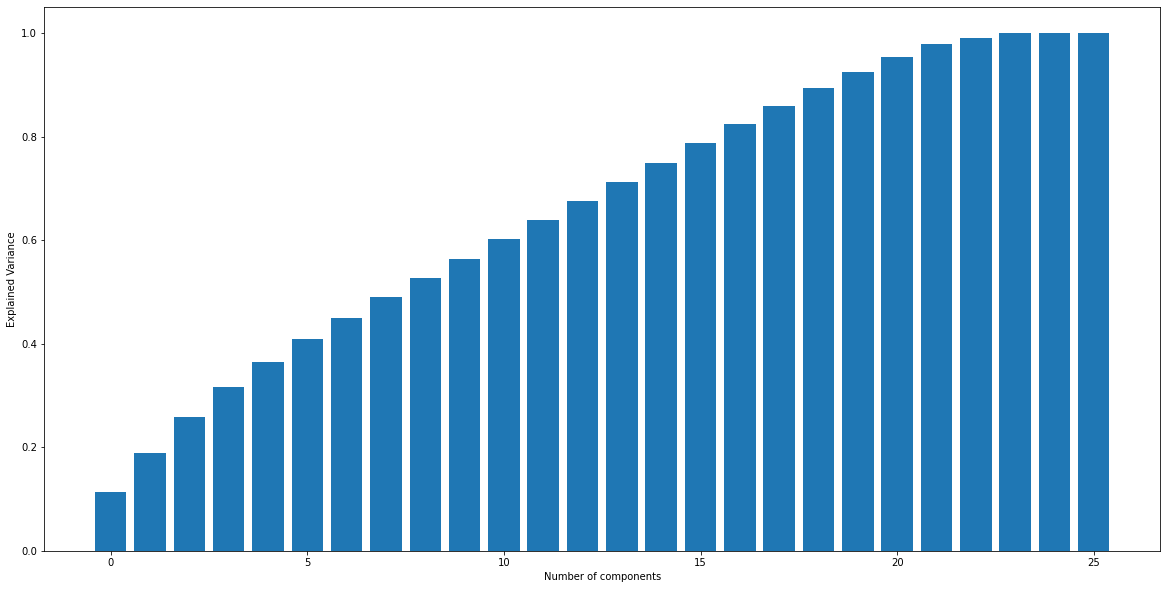

In [24]:
# Run PCA
from sklearn.decomposition import PCA
scalerdata = preprocessing.StandardScaler().fit(forpca_nor)
dataS = scalerdata.transform(forpca_nor)
pca = PCA(dataS.shape[1])
dataP = pca.fit_transform(dataS)
eigenvalues = pca.explained_variance_ratio_

#Plot explained variance per number of leading PC's 
#Find n_components from plot
import matplotlib.pyplot as plt
n = 26
plt.figure(figsize = (20,10))
plt.bar(np.arange(n), eigenvalues[:n].cumsum())
plt.xlabel("Number of components")
plt.ylabel("Explained Variance")
plt.show()

In [25]:
# PCA
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.multivariate.pca import PCA
from sklearn import preprocessing
pca = PCA(forpca, standardize=True, method='eig') 
normalized_dataset = pca.transformed_data

# Keep the dataset with chosen n_components = 16
components_df = pca.factors
components_df = components_df.iloc[:,:16]
components_df.head()

,comp_00,comp_01,comp_02,comp_03,comp_04,comp_05,comp_06,comp_07,comp_08,comp_09,comp_10,comp_11,comp_12,comp_13,comp_14,comp_15
0,0.000832,-0.000984,0.014349,0.010974,0.002995,-0.012063,-0.000731,-0.000060,0.003927,-0.000079,0.000302,0.001378,-0.000323,0.000046,0.000173,0.000043
1,-0.006520,-0.002343,0.010819,0.004481,-0.003839,-0.011459,0.000467,0.001467,0.004541,-0.000304,0.001127,0.001025,0.000070,0.000037,-0.000273,-0.000986
3,0.008447,0.001607,0.011014,-0.010226,-0.004937,0.017601,0.000094,0.008835,0.002538,0.001779,-0.000284,-0.000385,-0.000445,0.000076,0.000873,-0.002773
4,0.010977,0.006943,-0.006964,0.006222,-0.006543,0.004913,0.001003,-0.003622,0.000979,0.000158,-0.000309,-0.000568,0.000358,-0.000074,0.000110,0.000553
7,0.012022,0.004853,-0.009532,-0.004217,-0.001857,-0.000295,0.000080,0.000451,-0.001186,0.001623,0.000599,0.001327,0.000240,-0.000019,0.000208,-0.000093


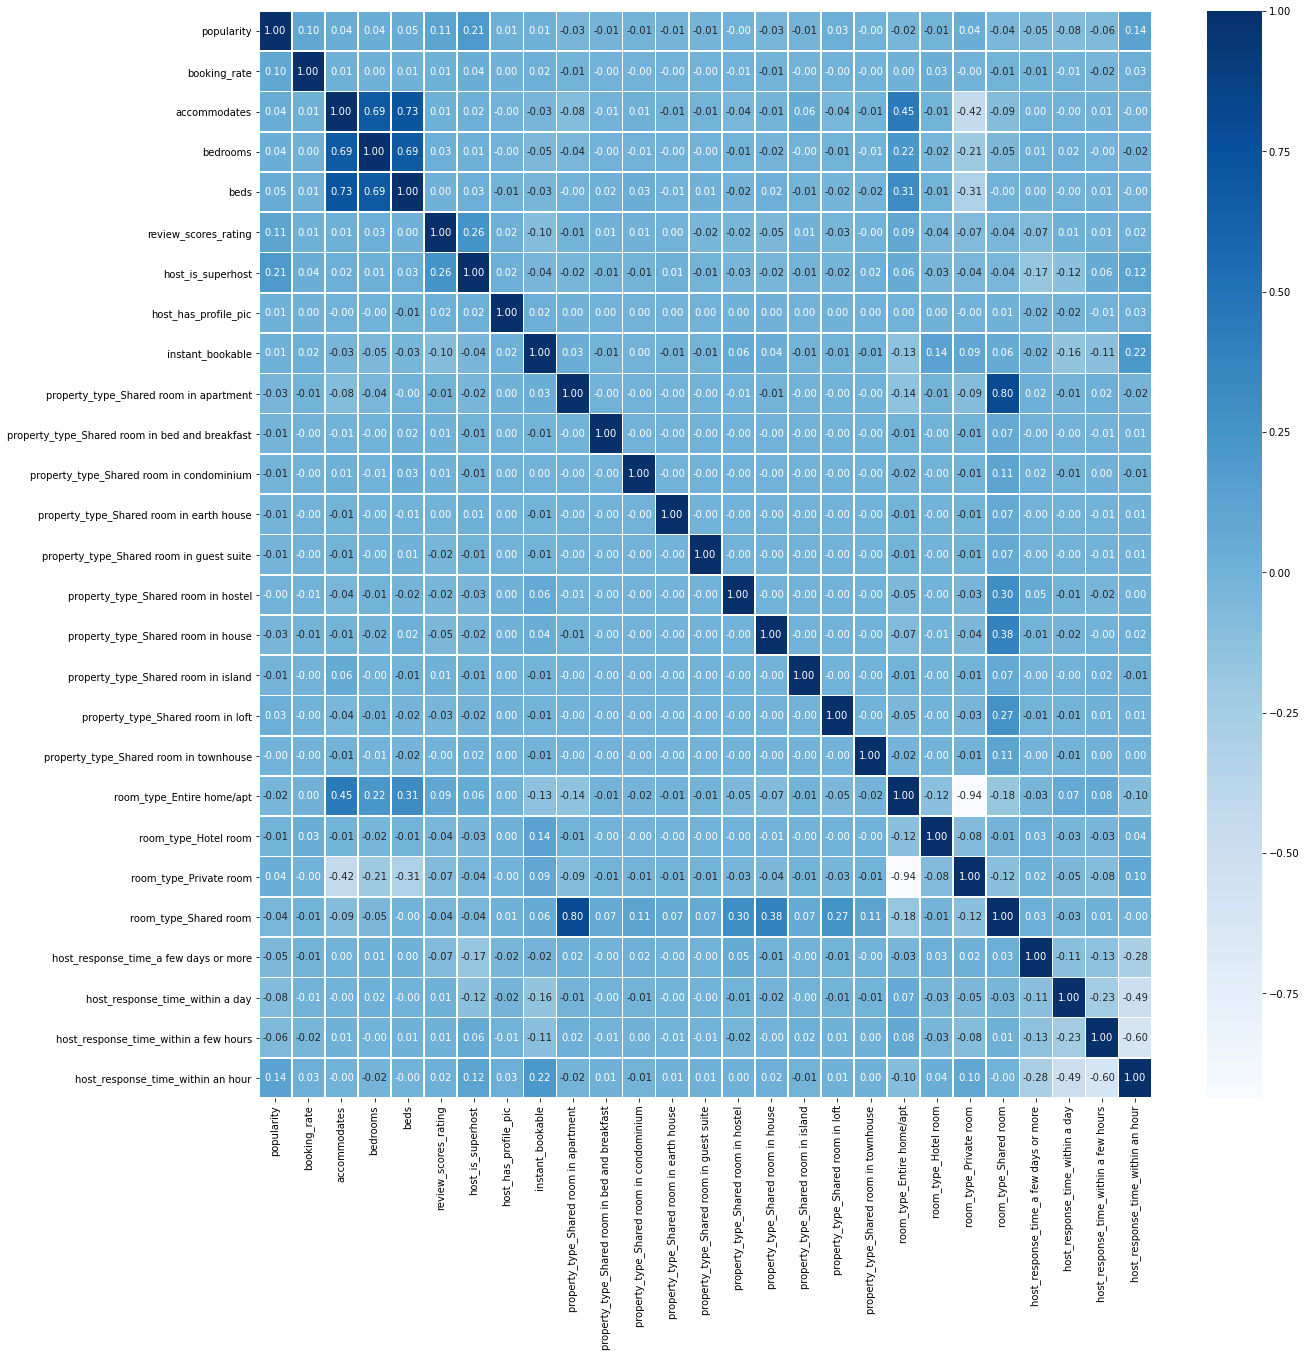

In [27]:
#covariance matrix
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
# Covariance Matrix
# bias =True, so dataset is normalized
# rowvar = False, each column represents a variable, i.e., a feature. This way we compute the covariance of features as whole instead of the covariance of each row
covariance_df = pd.DataFrame(data=np.cov(normalized_dataset, bias=True, rowvar=False), columns=forpca.columns)
# Plot Covariance Matrix
plt.subplots(figsize=(20, 20))
sns.heatmap(covariance_df, cmap='Blues', linewidths=.7, annot=True, fmt='.2f', yticklabels=forpca.columns)
plt.show()

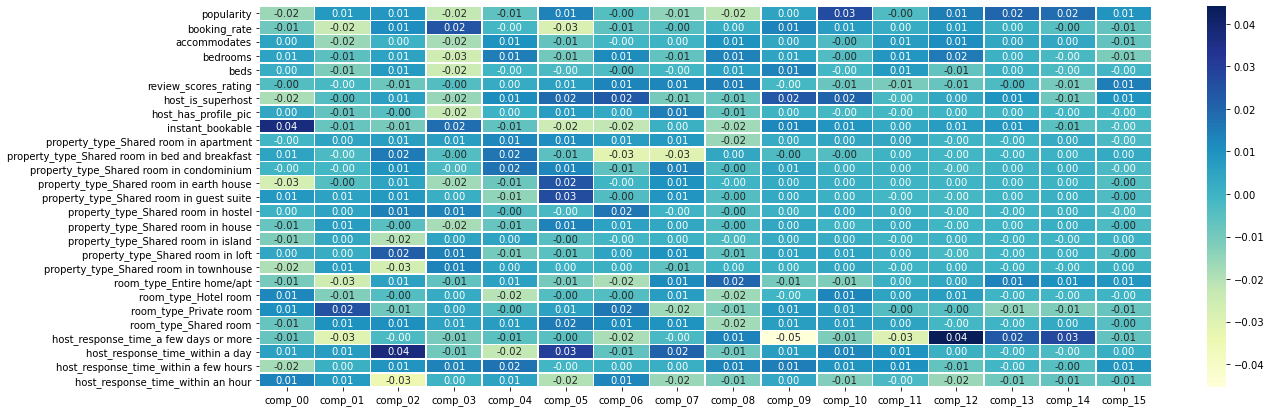

In [30]:
# correlation matrix
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
combined_df = pd.concat([forpca_nor, components_df], axis=1)
correlation = combined_df.corr()
# This matrix will have the correlation between:
# 1. feature vs features
# 2. feature vs principal component
# 3. principal component vs principal component
# We're removing part of the output to keep only the correlation between features and principal components
correlation_plot_data = correlation[:-len(components_df.columns)].loc[:, 'comp_00':]

# plot correlation matrix
fig, ax = plt.subplots(figsize=(20, 7))
sns.heatmap(correlation_plot_data, cmap='YlGnBu', linewidths=.7, annot=True, fmt='.2f')
plt.show()

In [32]:
# regression after PCA
#choose leading number of PCs as regressors and run linear regression again
#by zooming in, find x = 16 for 80% explained variance
from sklearn.decomposition import PCA
scalerdata = preprocessing.StandardScaler().fit(forpca_nor)
dataS = scalerdata.transform(forpca_nor)
pca = PCA(dataS.shape[1])
dataP = pca.fit_transform(dataS)
eigenvalues = pca.explained_variance_ratio_

np.random.seed(0)
R_IS=[]; R_OS=[] 
n = 20 
for i in range(n):
    X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size=0.3) 
    scaler = preprocessing.StandardScaler().fit(X_train) 
    pca = PCA(16) 
    P_train=pca.fit_transform(scaler.transform(X_train)) 
    res=sm.OLS(y_train,sm.add_constant(P_train)).fit() 
    P_test=pca.transform(scaler.transform(X_test))
    y_pred=np.asarray(res.predict(sm.add_constant(P_test)))
    
    R_IS.append(res.rsquared)
    R_OS.append(r2_score(y_test,y_pred))
print("IS R-squared is %.3f+-%.3f"%(np.mean(R_IS),np.std(R_IS)))
print("OS R-squared is %.3f+-%.3f"%(np.mean(R_OS),np.std(R_OS)))

IS R-squared is 0.004+-0.001
OS R-squared is -0.001+-0.006


In [37]:
df = components_df.copy()
df['booking_rate'] = forpca.booking_rate
df = df.reset_index(drop = True)
df.head()

,comp_00,comp_01,comp_02,comp_03,comp_04,comp_05,comp_06,comp_07,comp_08,comp_09,comp_10,comp_11,comp_12,comp_13,comp_14,comp_15,booking_rate
0,0.000832,-0.000984,0.014349,0.010974,0.002995,-0.012063,-0.000731,-0.000060,0.003927,-0.000079,0.000302,0.001378,-0.000323,0.000046,0.000173,0.000043,0.010591
1,-0.006520,-0.002343,0.010819,0.004481,-0.003839,-0.011459,0.000467,0.001467,0.004541,-0.000304,0.001127,0.001025,0.000070,0.000037,-0.000273,-0.000986,0.127352
2,0.008447,0.001607,0.011014,-0.010226,-0.004937,0.017601,0.000094,0.008835,0.002538,0.001779,-0.000284,-0.000385,-0.000445,0.000076,0.000873,-0.002773,0.115768
3,0.010977,0.006943,-0.006964,0.006222,-0.006543,0.004913,0.001003,-0.003622,0.000979,0.000158,-0.000309,-0.000568,0.000358,-0.000074,0.000110,0.000553,0.041839
4,0.012022,0.004853,-0.009532,-0.004217,-0.001857,-0.000295,0.000080,0.000451,-0.001186,0.001623,0.000599,0.001327,0.000240,-0.000019,0.000208,-0.000093,0.054338
